In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

**STEP 1**: open exploration

2000 randomly generated scenarios with no policy with aggregated results over the complete region (problem_formulation_id == 0)

In [7]:
# Reading the results file
from ema_workbench import load_results
file_name = 'data_processed/open_exploration/nopolicy.tar.gz'
results_np_overall = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_np_overall, outcomes_np_overall = results_np_overall

In [8]:
df_outcomes_np_overall = pd.DataFrame.from_dict(outcomes_np_overall)

In [9]:
df_outcomes_np_overall_adjusted = df_outcomes_np_overall.drop(df_outcomes_np_overall[["Total Investment Costs"]], axis = 1)

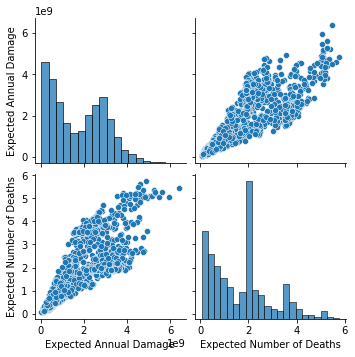

In [10]:
sns.pairplot(df_outcomes_np_overall_adjusted)
plt.show()

In [11]:
experiments_np_overall["discount rate 0"]

0       2.5
1       4.5
2       3.5
3       3.5
4       1.5
       ... 
1995    1.5
1996    2.5
1997    3.5
1998    2.5
1999    3.5
Name: discount rate 0, Length: 2000, dtype: category
Categories (4, float64): [1.5, 2.5, 3.5, 4.5]

In [12]:
experiments_np_overall_adjusted = experiments_np_overall.drop(experiments_np_overall[["discount rate 0", "discount rate 1","discount rate 2"]], axis = 1)

In [13]:
from ema_workbench.analysis import prim

data = df_outcomes_np_overall["Expected Number of Deaths"]

y_np_overall = data > np.percentile(data, 90)

prim_alg = prim.Prim(experiments_np_overall_adjusted ,y_np_overall, threshold=0.8, peel_alpha=0.05)
box1 = prim_alg.find_box()

In [14]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage        0.59
density     0.813793
id                50
mass          0.0725
mean        0.813793
res_dim            3
Name: 50, dtype: object

             box 50                                                          
                min       max                                       qp values
A.3_pfail  0.000336  0.153325                  [-1.0, 3.3083300786939725e-79]
A.1_pfail  0.251742  0.783340  [0.0001906482880487325, 0.0007592444594604624]
A.2_pfail  0.044582  0.999586                      [0.3555299375636986, -1.0]



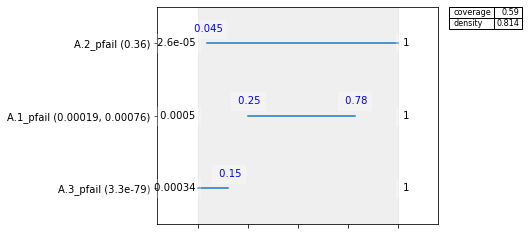

In [15]:
box1.inspect(50)
box1.inspect(50, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

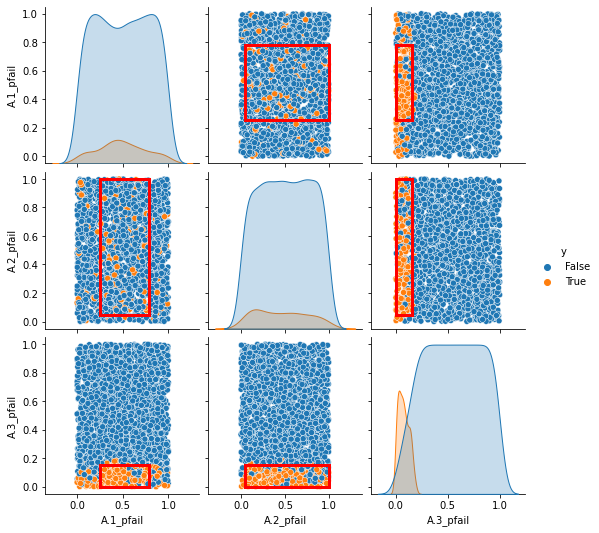

In [16]:
box1.select(50)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

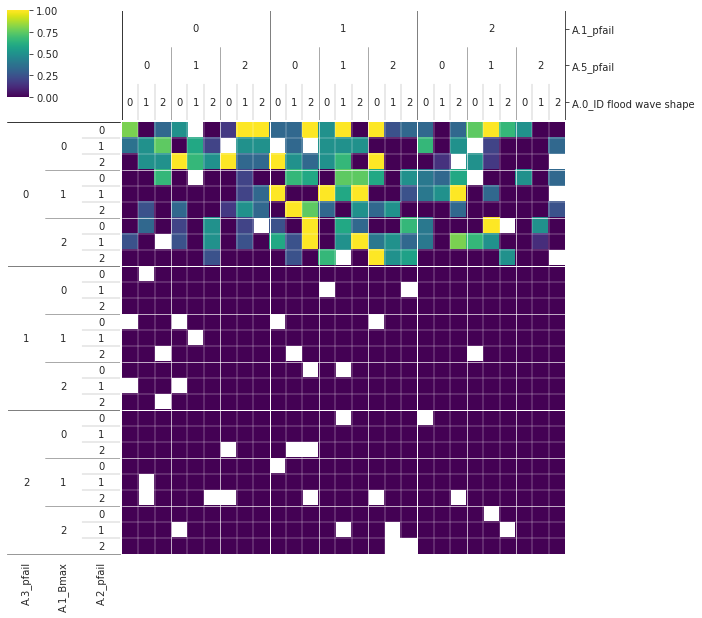

In [18]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(experiments_np_overall_adjusted, y_np_overall)
plt.show()

From the aggregated analysis it gets clear that the most casualties occur with a high probability of faillure of dike ring 3. This is in the Area of Zutphen and apparently this is the most vulnerable area. This will be analysed more in detail in the analysis aggregated over location. A strong dike in A1 and A2 also leads to more deaths, since this results in more water in Zutphen.

In [19]:
from ema_workbench.analysis import prim

data = df_outcomes_np_overall["Expected Annual Damage"]

y_np_overall_damage = data >= np.percentile(data, 80)

prim_alg = prim.Prim(experiments_np_overall,y_np_overall_damage, threshold=0.8, peel_alpha=0.05)
box1_damage = prim_alg.find_box()

In [20]:
box1_damage.inspect_tradeoff()

alt.VConcatChart(...)

coverage        0.38
density     0.873563
id                24
mass           0.087
mean        0.873563
res_dim            3
Name: 24, dtype: object

                      box 24                                            
                         min         max                       qp values
A.1_pfail        0.000496887    0.355448   [-1.0, 8.030537819792364e-49]
discount rate 2   {1.5, 2.5}  {1.5, 2.5}  [1.0797208938395957e-11, -1.0]
discount rate 1   {1.5, 2.5}  {1.5, 2.5}   [9.069217339126156e-08, -1.0]



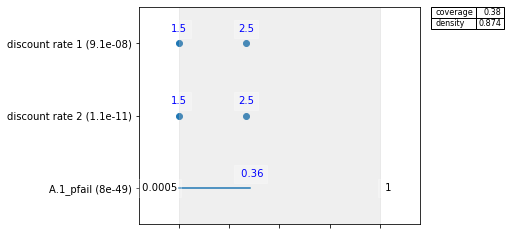

In [21]:
box1_damage.inspect(24)
box1_damage.inspect(24, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

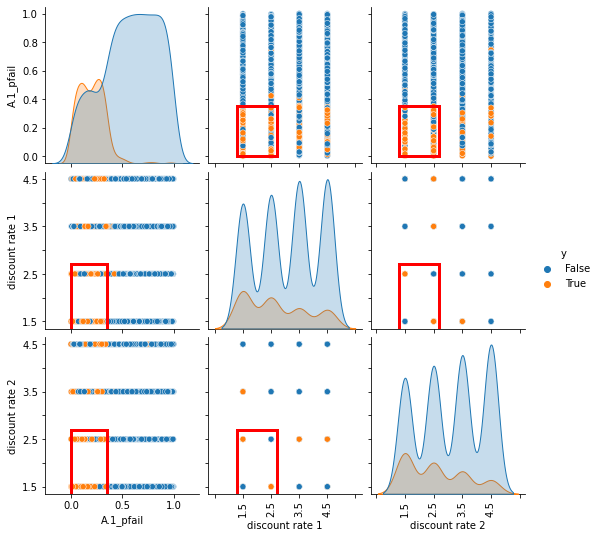

In [22]:
box1_damage.select(24)
fig = box1_damage.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

**Open exploration aggregated over the locations:**

In this section we analyse how the system functions in the different regions when there is no policy. Since we represent the province of Gelderland, a more in detail analysis of dike ring A1, A2 and A3 is analysed. 


4000 scenarios with no policy:

In [23]:
# Reading the results file
from ema_workbench import load_results
file_name = 'data_processed/open_exploration/nopolicy_locations.tar.gz'
results_np_loc = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_np_loc, outcomes_np_loc = results_np_loc

In [24]:
experiments_np_loc

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,107.0,136.113287,10.0,0.891347,298.222159,1.0,0.997847,264.721731,1.0,0.413864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4004,Policy 0,dikesnet
1,70.0,210.992827,1.5,0.919565,206.378068,1.5,0.373642,261.315345,1.0,0.499136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4005,Policy 0,dikesnet
2,44.0,194.259643,10.0,0.056464,66.558422,10.0,0.954512,209.698352,1.0,0.944407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4006,Policy 0,dikesnet
3,60.0,180.791233,1.5,0.496713,234.442547,1.0,0.807202,75.860085,10.0,0.437180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4007,Policy 0,dikesnet
4,65.0,252.814495,10.0,0.339488,213.594077,10.0,0.877404,260.716609,1.0,0.523509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,19.0,206.620975,1.5,0.061329,262.181051,1.5,0.863217,311.398642,1.5,0.682734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7999,Policy 0,dikesnet
3996,1.0,70.597689,1.0,0.976886,176.227107,1.0,0.457602,342.996504,10.0,0.706397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000,Policy 0,dikesnet
3997,129.0,103.531332,1.0,0.972579,38.843144,1.0,0.713676,132.513108,10.0,0.896109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8001,Policy 0,dikesnet
3998,59.0,106.199639,10.0,0.153566,219.536996,1.5,0.623038,243.260135,10.0,0.090566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8002,Policy 0,dikesnet


In [25]:
df_outcomes_np_loc = pd.DataFrame.from_dict(outcomes_np_loc)

In [26]:
df_outcomes_np_loc

,A.1 Total Costs,A.1_Expected Annual Damage,A.1_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,A.2 Total Costs,A.2_Expected Annual Damage,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Annual Damage,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths
0,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,7.278693e+05,7.278693e+05,0.000688,3.426359e+08,3.426359e+08,0.571724,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,1.029448e+08,1.029448e+08,0.121829,4.032881e+07,4.032881e+07,0.090066,3.597040e+07,3.597040e+07,0.020780,0.000000e+00,0.000000e+00,0.000000
2,2.808874e+09,2.808874e+09,1.950129,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
3,2.470547e+08,2.470547e+08,0.194855,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,2.861322e+08,2.861322e+08,0.566592,0.000000e+00,0.000000e+00,0.000000,4.593899e+08,4.593899e+08,0.453995
4,2.784809e+09,2.784809e+09,1.723963,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3.688589e+09,3.688589e+09,1.959069,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,9.481528e+06,9.481528e+06,0.003247,0.000000e+00,0.000000e+00,0.000000
3996,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,7.783738e+07,7.783738e+07,0.080050,1.008550e+07,1.008550e+07,0.020052,8.351226e+07,8.351226e+07,0.040743,3.184454e+08,3.184454e+08,0.300434
3997,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,2.632888e+07,2.632888e+07,0.021882,2.220765e+07,2.220765e+07,0.034953,1.004483e+06,1.004483e+06,0.000475,0.000000e+00,0.000000e+00,0.000000
3998,2.736720e+09,2.736720e+09,1.971488,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,1.141397e+09,1.141397e+09,2.057743,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000


In [27]:
cleaned_outcomes_np_loc = df_outcomes_np_loc.drop(df_outcomes_np_loc.columns[[0,3,4,5,8,11,14]], axis = 1)

In [28]:
cleaned_outcomes_np_loc

,A.1_Expected Annual Damage,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Expected Number of Deaths
0,0.000000e+00,0.000000,7.278693e+05,0.000688,3.426359e+08,0.571724,0.000000e+00,0.000000,0.000000e+00,0.000000
1,0.000000e+00,0.000000,1.029448e+08,0.121829,4.032881e+07,0.090066,3.597040e+07,0.020780,0.000000e+00,0.000000
2,2.808874e+09,1.950129,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
3,2.470547e+08,0.194855,0.000000e+00,0.000000,2.861322e+08,0.566592,0.000000e+00,0.000000,4.593899e+08,0.453995
4,2.784809e+09,1.723963,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...
3995,3.688589e+09,1.959069,0.000000e+00,0.000000,0.000000e+00,0.000000,9.481528e+06,0.003247,0.000000e+00,0.000000
3996,0.000000e+00,0.000000,7.783738e+07,0.080050,1.008550e+07,0.020052,8.351226e+07,0.040743,3.184454e+08,0.300434
3997,0.000000e+00,0.000000,2.632888e+07,0.021882,2.220765e+07,0.034953,1.004483e+06,0.000475,0.000000e+00,0.000000
3998,2.736720e+09,1.971488,0.000000e+00,0.000000,1.141397e+09,2.057743,0.000000e+00,0.000000,0.000000e+00,0.000000


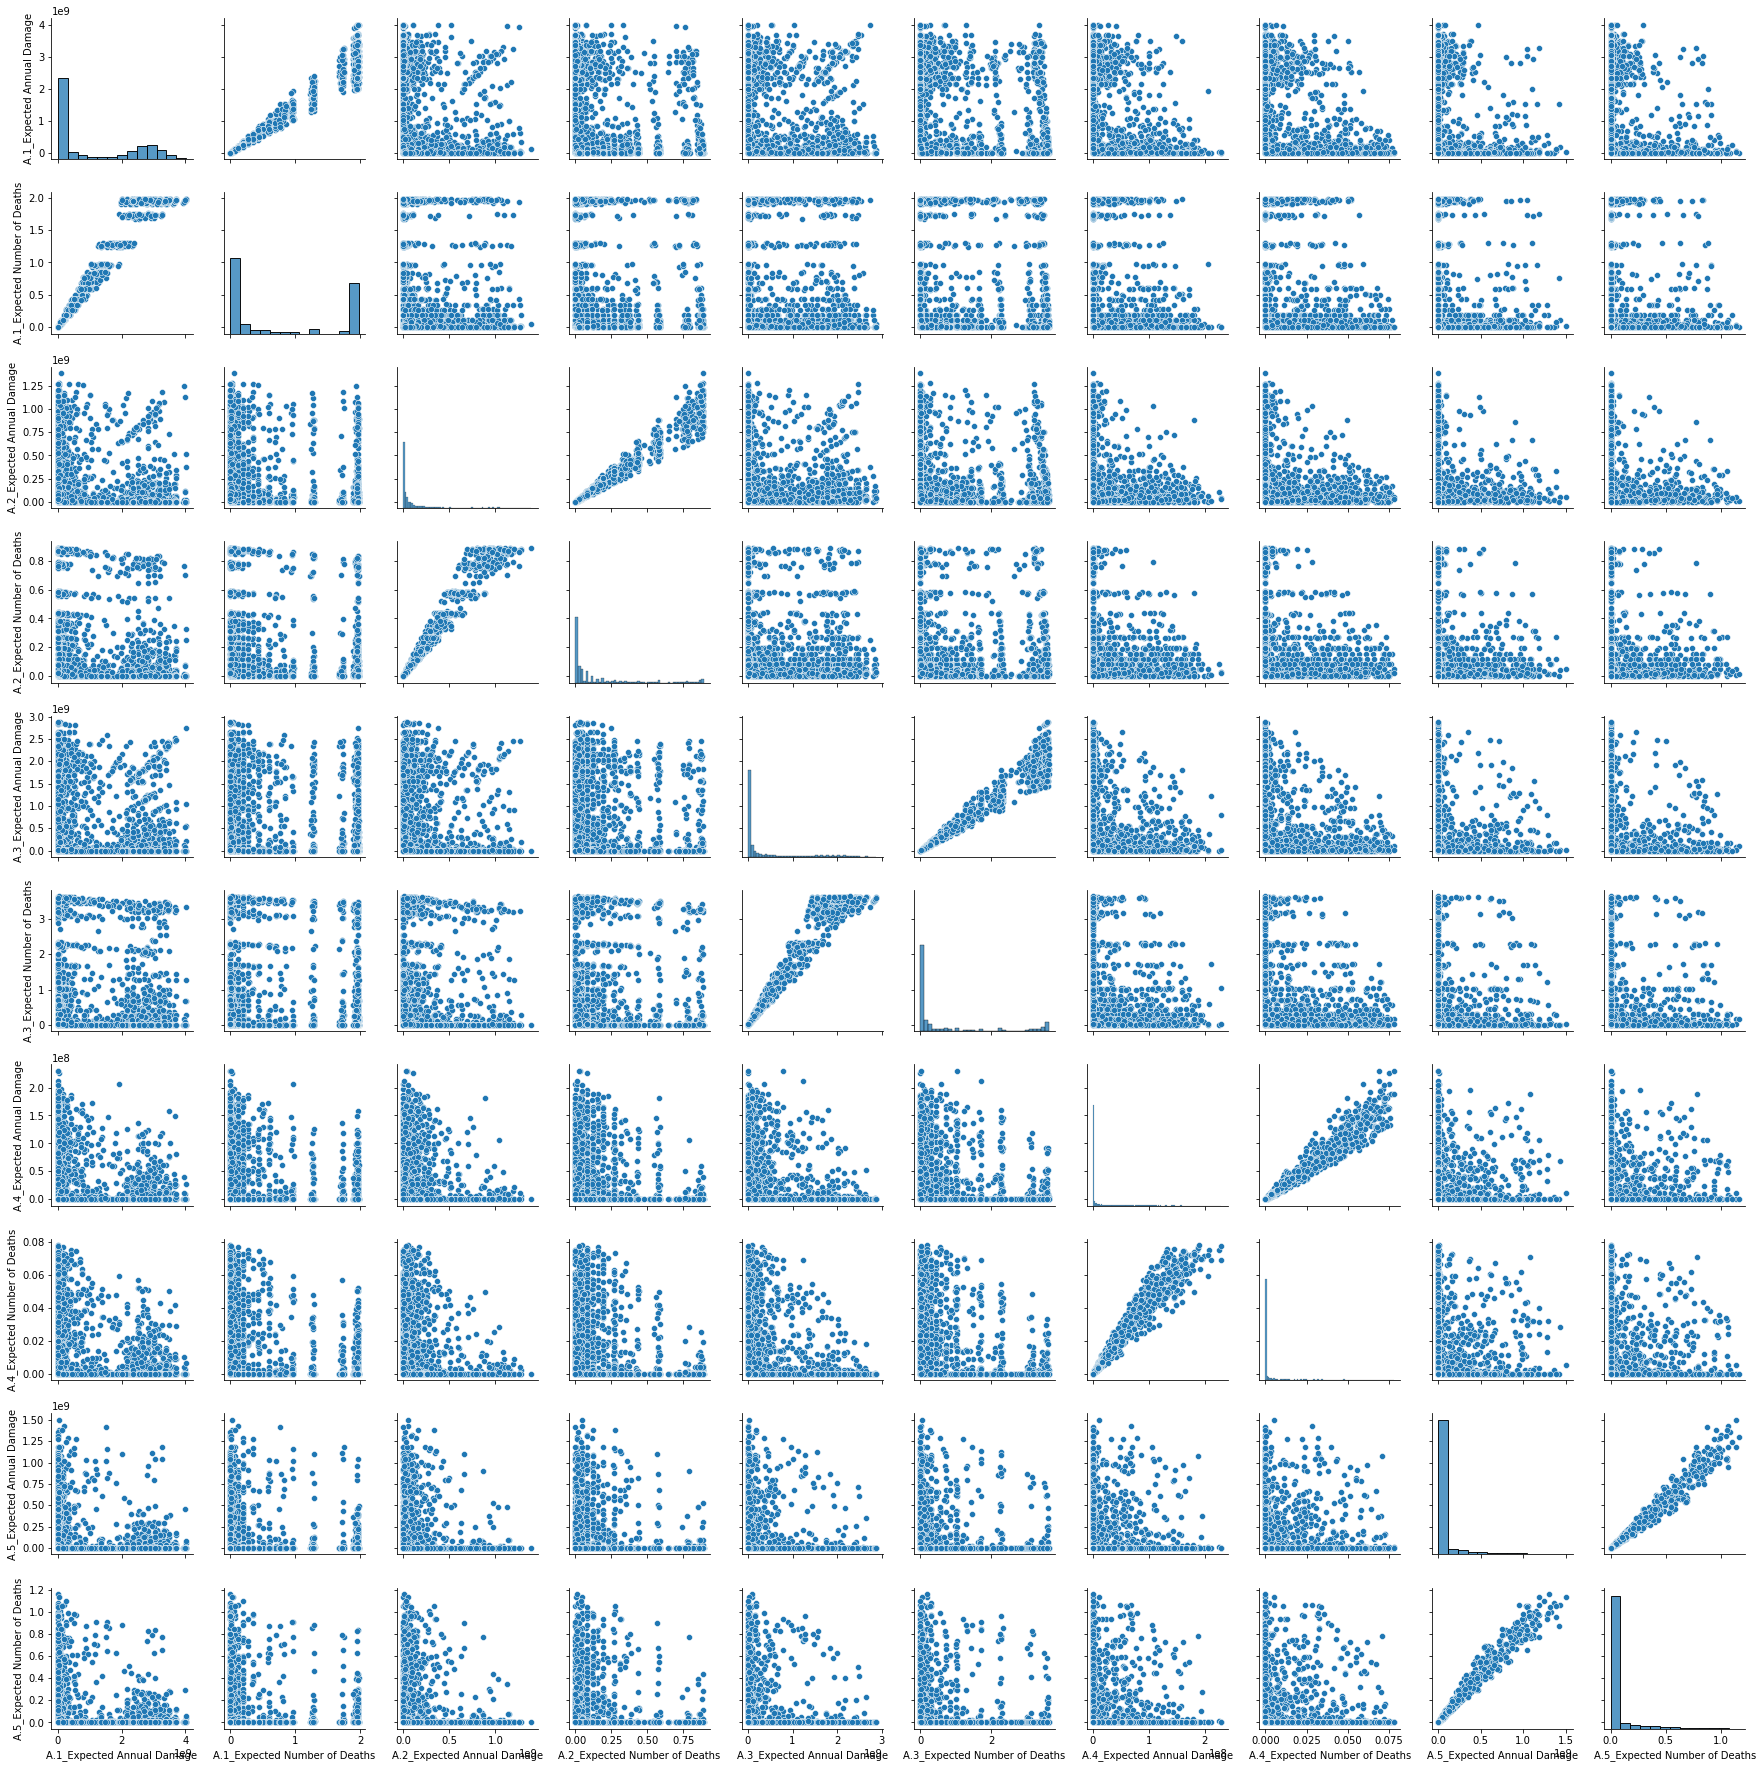

In [29]:
sns.pairplot(cleaned_outcomes_np_loc)
plt.show()

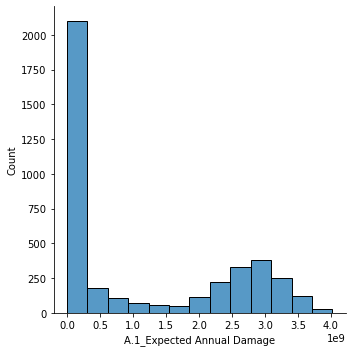

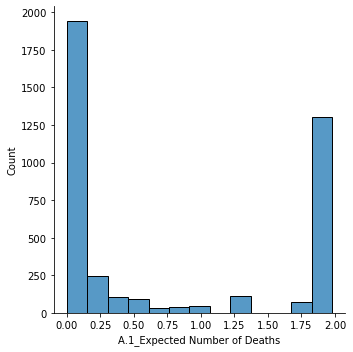

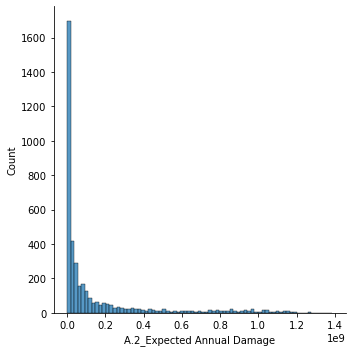

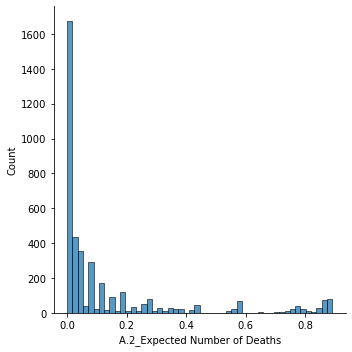

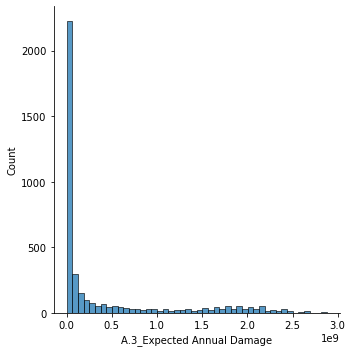

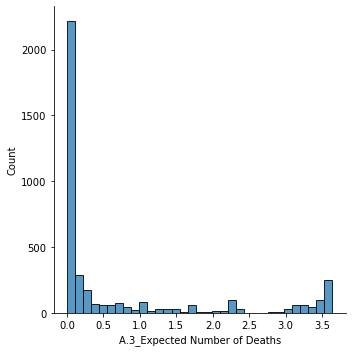

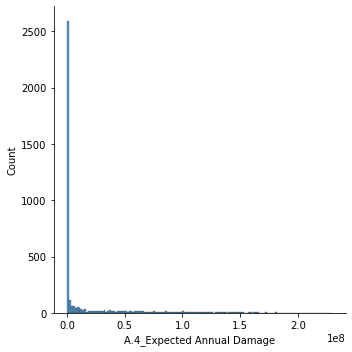

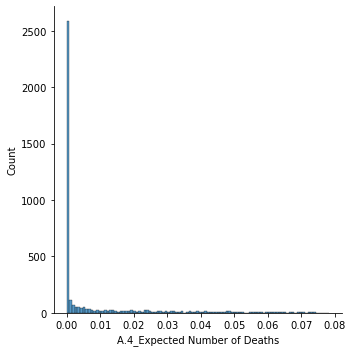

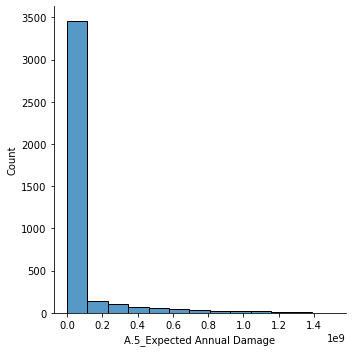

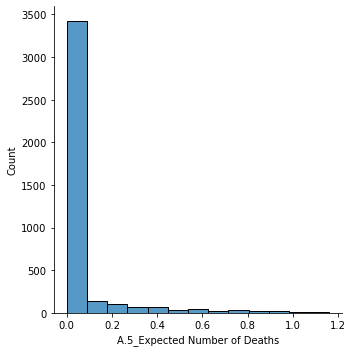

In [30]:
for col in cleaned_outcomes_np_loc:
    sns.displot(cleaned_outcomes_np_loc,x = col)
    plt.show()
    

**analysis**



from the plots above, we can see that the highest expected annual damage is expected to occur in dike ring 1 and the highest number of deaths in dike ring 3 in the no policy case. The expected numbers of deaths in dike ring 1 is however also very high. It seams that A2 is relatively safe in regard to flood safety. The same goes for A4 and A5.






In [31]:
from ema_workbench.analysis import prim

data = df_outcomes_np_loc["A.3_Expected Number of Deaths"]

y_A3_expected_deaths = data >= np.percentile(data, 90)

prim_alg = prim.Prim(experiments_np_loc,y_A3_expected_deaths, threshold=0.8, peel_alpha=0.05)
box2 = prim_alg.find_box()

In [32]:
box2.inspect_tradeoff()

alt.VConcatChart(...)

coverage        0.97
density     0.810021
id                41
mass         0.11975
mean        0.810021
res_dim            3
Name: 41, dtype: object

             box 41                                           
                min       max                        qp values
A.3_pfail  0.000099  0.155207  [-1.0, 2.0040488730839447e-255]
A.1_pfail  0.188238  0.999920    [2.881646427403055e-11, -1.0]
A.2_pfail  0.050037  0.999966     [0.033410878831819736, -1.0]



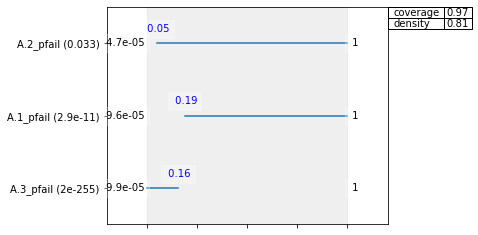

In [33]:
box2.inspect(41)
box2.inspect(41, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

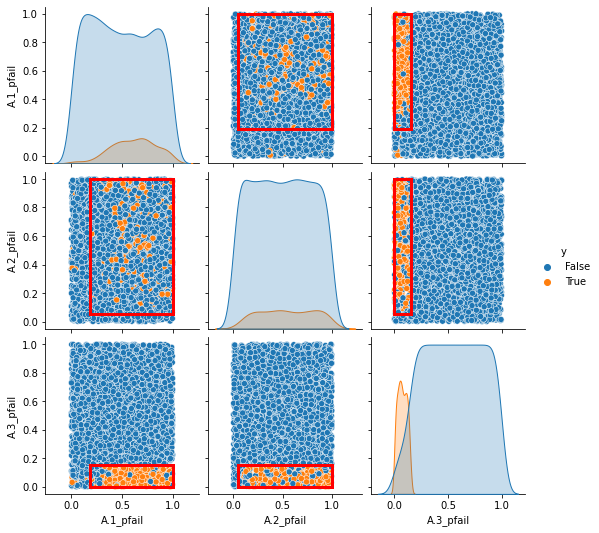

In [34]:
box2.select(41)
fig = box2.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

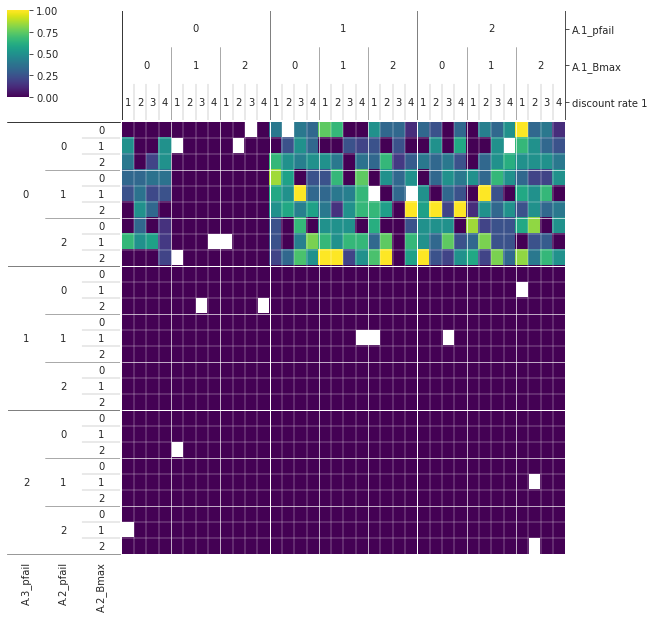

In [35]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(experiments_np_loc, y_A3_expected_deaths)
plt.show()

In [36]:
from ema_workbench.analysis import prim

data = df_outcomes_np_loc["A.1_Expected Annual Damage"]

y_A1_expected_damage = data >= np.percentile(data, 90)

prim_alg = prim.Prim(experiments_np_loc,y_A1_expected_damage, threshold=0.8, peel_alpha=0.05)
box3 = prim_alg.find_box()

In [37]:
box3.inspect_tradeoff()

alt.VConcatChart(...)

coverage      0.5575
density     0.851145
id                26
mass          0.0655
mean        0.851145
res_dim            4
Name: 26, dtype: object

                          box 26                   \
                             min              max   
A.1_pfail            9.59204e-05         0.336478   
discount rate 2       {1.5, 2.5}       {1.5, 2.5}   
discount rate 1       {1.5, 2.5}       {1.5, 2.5}   
discount rate 0  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   

                                                 
                                      qp values  
A.1_pfail         [-1.0, 6.238589751115418e-78]  
discount rate 2   [2.629227788540393e-22, -1.0]  
discount rate 1  [1.9314393479964858e-19, -1.0]  
discount rate 0  [1.2998452355606585e-07, -1.0]  



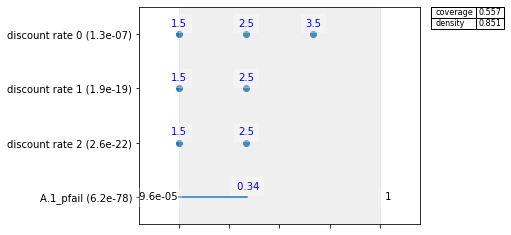

In [38]:
box3.inspect(26)
box3.inspect(26, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

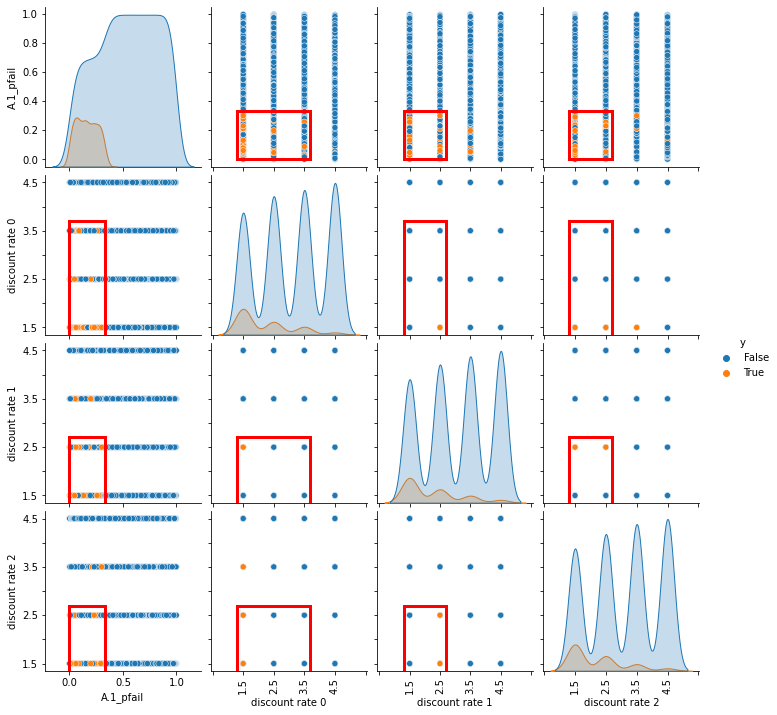

In [39]:
box3.select(26)
fig = box3.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

**Analysis**

WE can see that most damage occurs at high dike failure (low pfail) and low discount rates, the same results can be found from the dimensional stacking. It has to mentioned that there are a few white spaces, meaning that the amounts of scenarios is not high enough. But for this analysis, the trends can be observed.

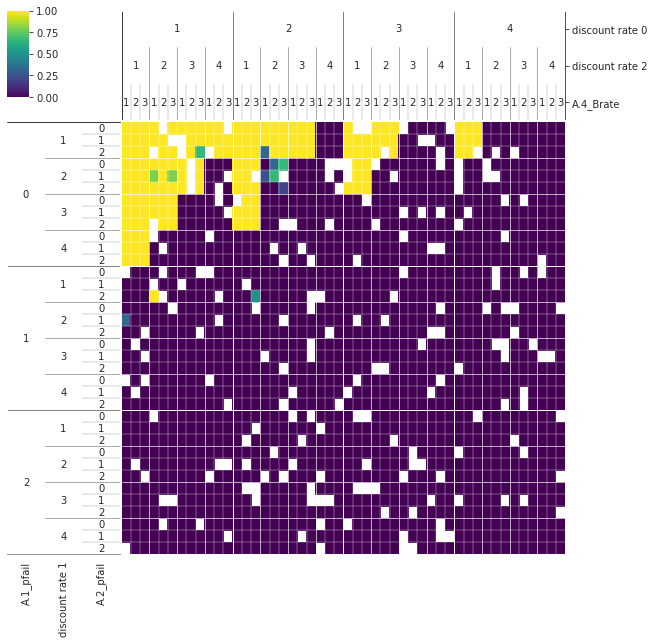

In [40]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(experiments_np_loc, y_A1_expected_damage)
plt.show()

In [41]:
from ema_workbench.analysis import prim

data = df_outcomes_np_loc["A.1_Expected Number of Deaths"]

y_A1_expected_deaths = data > np.percentile(data, 70)

prim_alg = prim.Prim(experiments_np_loc,y_A1_expected_deaths, threshold=0.8, peel_alpha=0.05)
box3_deaths = prim_alg.find_box()

In [42]:
box3_deaths.inspect_tradeoff()

alt.VConcatChart(...)

coverage          1
density     0.83485
id               20
mass        0.35725
mean        0.83485
res_dim           1
Name: 20, dtype: object

             box 20                       
                min       max    qp values
A.1_pfail  0.000096  0.357265  [-1.0, 0.0]



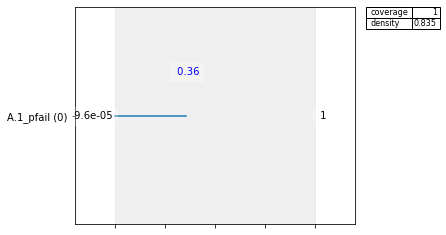

In [43]:
box3_deaths.inspect(20)
box3_deaths.inspect(20, style='graph')
plt.show()

In [44]:
from ema_workbench.analysis import prim

data = df_outcomes_np_loc["A.2_Expected Number of Deaths"]

y_A2_expected_deaths = data > np.percentile(data, 70)

prim_alg = prim.Prim(experiments_np_loc,y_A2_expected_deaths, threshold=0.8, peel_alpha=0.05)
box3_deaths_A2 = prim_alg.find_box()

In [45]:
box3_deaths_A2.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.914167
density     0.808401
id                21
mass         0.33925
mean        0.808401
res_dim            2
Name: 21, dtype: object

             box 21                                          
                min       max                       qp values
A.2_pfail  0.000047  0.417277  [-1.0, 6.066751974324964e-272]
A.1_pfail  0.187258  0.999920  [2.7313241110037955e-17, -1.0]



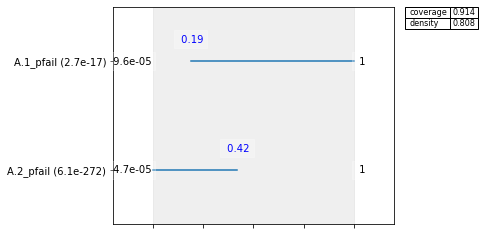

In [46]:
box3_deaths_A2.inspect(21)
box3_deaths_A2.inspect(21, style='graph')
plt.show()

Open exploration with 4000 random policies on three scenarios:
    
scenario 1: ref scenario
{'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5, 'ID flood wave shape': 4, 'planning steps': 2, 'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5}


scenario 2: high Bmax:
{'Bmax': 350, 'Brate': 1.5, 'pfail': 0.5, 'ID flood wave shape': 4, 'planning steps': 2, 'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5}


scenario 3: low pfail:
{'Bmax': 175, 'Brate': 1.5, 'pfail': 0.1, 'ID flood wave shape': 4, 'planning steps': 2, 'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5}

Since the values of the outcomes of high Bmax dont differ from the ref scenario, this scenario is not used in the final report

In [47]:
# Reading the results file
from ema_workbench import load_results
file_name = 'data_processed/open_exploration/refscenario_randompolicy_locations.tar.gz'
results_randpol_loc_refscenario = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_randpol_loc_refscenario, outcomes_randpol_loc_refscenario = results_randpol_loc_refscenario

In [48]:
experiments_randpol_loc_refscenario

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,0.0,8.0,2.0,4.0,2.0,8.0,1.0,reference,3034,dikesnet
1,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,0.0,3.0,5.0,3.0,4.0,5.0,1.0,reference,3035,dikesnet
2,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,0.0,3.0,3.0,5.0,6.0,5.0,2.0,reference,3036,dikesnet
3,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,2.0,3.0,3.0,7.0,1.0,7.0,4.0,reference,3037,dikesnet
4,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,6.0,4.0,7.0,1.0,10.0,0.0,1.0,reference,3038,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,8.0,7.0,0.0,3.0,8.0,9.0,0.0,reference,7029,dikesnet
3996,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,4.0,0.0,1.0,7.0,5.0,2.0,4.0,reference,7030,dikesnet
3997,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,8.0,9.0,3.0,5.0,0.0,9.0,2.0,reference,7031,dikesnet
3998,3.5,3.5,3.5,4.0,175.0,0.5,1.5,175.0,0.5,1.5,...,8.0,6.0,1.0,0.0,9.0,10.0,4.0,reference,7032,dikesnet


In [49]:
df_outcomes_randpol_loc_refscenario =pd.DataFrame.from_dict(outcomes_randpol_loc_refscenario)

In [50]:
df_outcomes_randpol_loc_refscenario

,A.1 Total Costs,A.1_Expected Annual Damage,A.1_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,A.2 Total Costs,A.2_Expected Annual Damage,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Annual Damage,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths
0,2.089691e+08,0.0,0.0,1.307200e+09,12.621076,2.565663e+08,0.000000e+00,0.000000,7.290423e+07,0.000000e+00,0.000000,2.600334e+07,3.011823e+05,0.000067,1.242110e+08,0.000000e+00,0.000000
1,1.576980e+08,0.0,0.0,9.793000e+08,49.789167,2.470231e+08,0.000000e+00,0.000000,1.394765e+08,0.000000e+00,0.000000,2.186816e+07,1.172080e+06,0.000254,1.136704e+08,0.000000e+00,0.000000
2,1.658501e+08,0.0,0.0,1.390100e+09,20.836655,1.752324e+08,0.000000e+00,0.000000,1.075742e+08,0.000000e+00,0.000000,1.810068e+07,2.973376e+05,0.000027,1.373947e+08,0.000000e+00,0.000000
3,1.340882e+08,0.0,0.0,9.299000e+08,0.000000,2.563460e+08,0.000000e+00,0.000000,1.335551e+08,0.000000e+00,0.000000,2.637292e+07,0.000000e+00,0.000000,1.336921e+08,0.000000e+00,0.000000
4,1.769111e+08,0.0,0.0,8.137000e+08,88.628014,2.426500e+08,0.000000e+00,0.000000,5.281117e+07,0.000000e+00,0.000000,4.440404e+07,0.000000e+00,0.000000,8.757273e+07,2.370948e+06,0.000952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.699512e+08,0.0,0.0,9.282000e+08,0.000000,2.437794e+08,0.000000e+00,0.000000,6.226744e+07,0.000000e+00,0.000000,3.476877e+07,0.000000e+00,0.000000,1.608193e+08,0.000000e+00,0.000000
3996,2.550238e+08,0.0,0.0,1.285900e+09,355.500490,1.484454e+08,4.570942e+06,0.000625,8.559858e+07,0.000000e+00,0.000000,1.692524e+07,0.000000e+00,0.000000,1.318692e+08,0.000000e+00,0.000000
3997,1.647414e+08,0.0,0.0,2.672000e+08,0.000000,1.296885e+08,0.000000e+00,0.000000,1.274930e+08,0.000000e+00,0.000000,5.481434e+07,0.000000e+00,0.000000,9.950717e+07,0.000000e+00,0.000000
3998,1.418471e+08,0.0,0.0,1.184300e+09,1426.530271,3.109535e+08,0.000000e+00,0.000000,8.391961e+07,2.248037e+06,0.000594,4.269425e+07,0.000000e+00,0.000000,1.460826e+08,1.424969e+07,0.001901


In [51]:
#To better observe the impact of the levers, the uncertainties are filtered out
cleaned_experiments_ref_scenario = experiments_randpol_loc_refscenario.drop(experiments_randpol_loc_refscenario.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)




In [52]:
for col in cleaned_experiments_ref_scenario.columns:
    print(col)

0_RfR 0
0_RfR 1
0_RfR 2
1_RfR 0
1_RfR 1
1_RfR 2
2_RfR 0
2_RfR 1
2_RfR 2
3_RfR 0
3_RfR 1
3_RfR 2
4_RfR 0
4_RfR 1
4_RfR 2
A.1_DikeIncrease 0
A.1_DikeIncrease 1
A.1_DikeIncrease 2
A.2_DikeIncrease 0
A.2_DikeIncrease 1
A.2_DikeIncrease 2
A.3_DikeIncrease 0
A.3_DikeIncrease 1
A.3_DikeIncrease 2
A.4_DikeIncrease 0
A.4_DikeIncrease 1
A.4_DikeIncrease 2
A.5_DikeIncrease 0
A.5_DikeIncrease 1
A.5_DikeIncrease 2
EWS_DaysToThreat


**The effect of the different levers in different areas are analysed using a prim analysis and a dimensional stacking analysis.**

In [53]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_refscenario["A.3_Expected Number of Deaths"]

y_A3_pol_ref_deaths = data == 0

prim_alg = prim.Prim(cleaned_experiments_ref_scenario,y_A3_pol_ref_deaths, threshold=0.8, peel_alpha=0.01)
box4 = prim_alg.find_box()

In [54]:
box4.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.984726
density     0.939769
id                 1
mass           0.909
mean        0.939769
res_dim            1
Name: 1, dtype: object

                   box 1                                     
                     min   max                      qp values
A.3_DikeIncrease 0   0.5  10.0  [8.269409591084629e-46, -1.0]



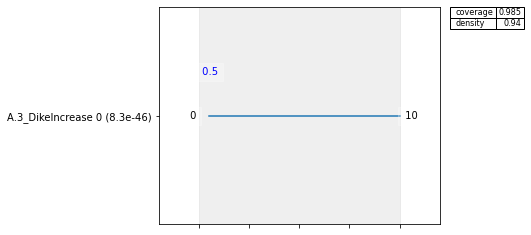

In [55]:
box4.inspect(1)
box4.inspect(1, style='graph')
plt.show()

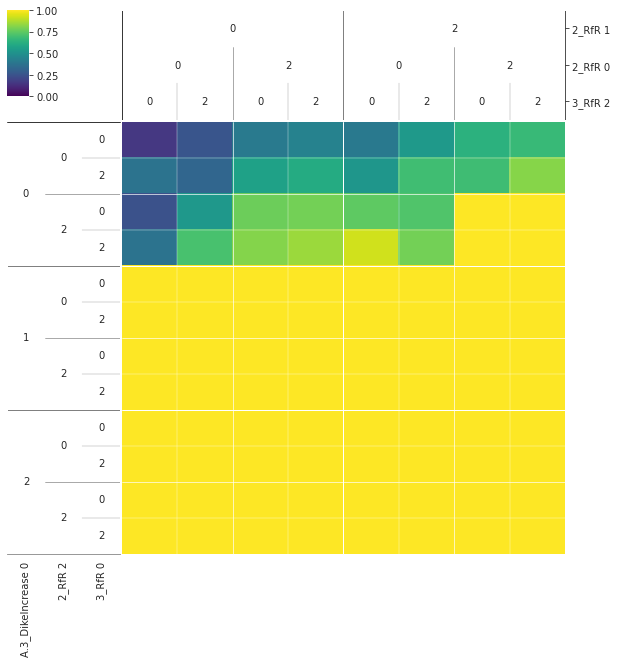

In [56]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_ref_scenario, y_A3_pol_ref_deaths)
plt.show()

A dike increase has the highest impact for the safety of the citizens in Zutphen, but room for the river in area 1 and 2 also has a positive impact

Now we analyse 4000 random scenarios with a high value for Bmax

(the effect is not observable and therefore not included in the final report)

In [57]:
# Reading the results file
from ema_workbench import load_results
file_name = 'data_processed/open_exploration/high_Bmax_randompolicy_locations.tar.gz'
results_randpol_loc_Bmaxscenario = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_randpol_loc_Bmaxscenario, outcomes_randpol_loc_Bmaxscenario = results_randpol_loc_Bmaxscenario

In [58]:
df_outcomes_randpol_loc_Bmaxscenario =pd.DataFrame.from_dict(outcomes_randpol_loc_Bmaxscenario)

In [59]:
cleaned_experiments_Bmax_scenario = experiments_randpol_loc_Bmaxscenario.drop(experiments_randpol_loc_Bmaxscenario.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)

In [60]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_Bmaxscenario["A.3_Expected Number of Deaths"]

y_A3_pol_Bmax_deaths = data < 0.00001

prim_alg = prim.Prim(cleaned_experiments_Bmax_scenario, y_A3_pol_Bmax_deaths, threshold=0.8, peel_alpha=0.01)
box5 = prim_alg.find_box()

In [61]:
box5.inspect_tradeoff()

alt.VConcatChart(...)

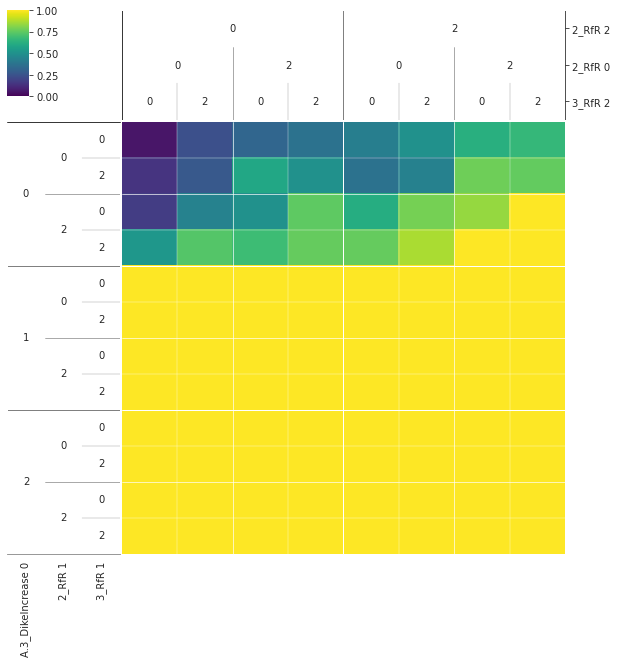

In [62]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_Bmax_scenario, y_A3_pol_Bmax_deaths)
plt.show()

**from here on we analyse the effect of the different levers in the case of low pfail values:** 



In [63]:
# Reading the results file
from ema_workbench import load_results
file_name = 'data_processed/open_exploration/low_pfail_randompolicy_locations.tar.gz'
results_randpol_loc_pfailscenario = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_randpol_loc_pfailscenario, outcomes_randpol_loc_pfailscenario = results_randpol_loc_pfailscenario

In [64]:
df_outcomes_randpol_loc_pfailscenario =pd.DataFrame.from_dict(outcomes_randpol_loc_pfailscenario)

In [65]:
cleaned_experiments_pfailscenario = experiments_randpol_loc_pfailscenario.drop(experiments_randpol_loc_pfailscenario.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)

In [66]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_pfailscenario["A.3_Expected Number of Deaths"]

y_A3_pol_pfail_deaths = data == 0

prim_alg = prim.Prim(cleaned_experiments_pfailscenario, y_A3_pol_pfail_deaths, threshold=0.8, peel_alpha=0.01)
box6 = prim_alg.find_box()

In [67]:
box6.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.938828
density     0.868369
id                 4
mass         0.63625
mean        0.868369
res_dim            1
Name: 4, dtype: object

                   box 4                                      
                     min   max                       qp values
A.3_DikeIncrease 0   3.5  10.0  [8.071357439927562e-210, -1.0]



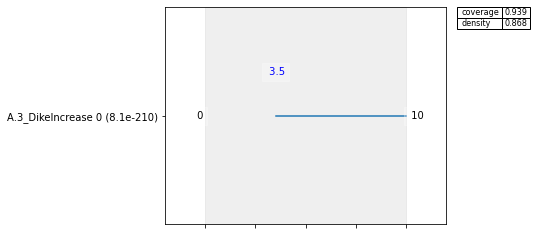

In [68]:
box6.inspect(4)
box6.inspect(4, style='graph')
plt.show()

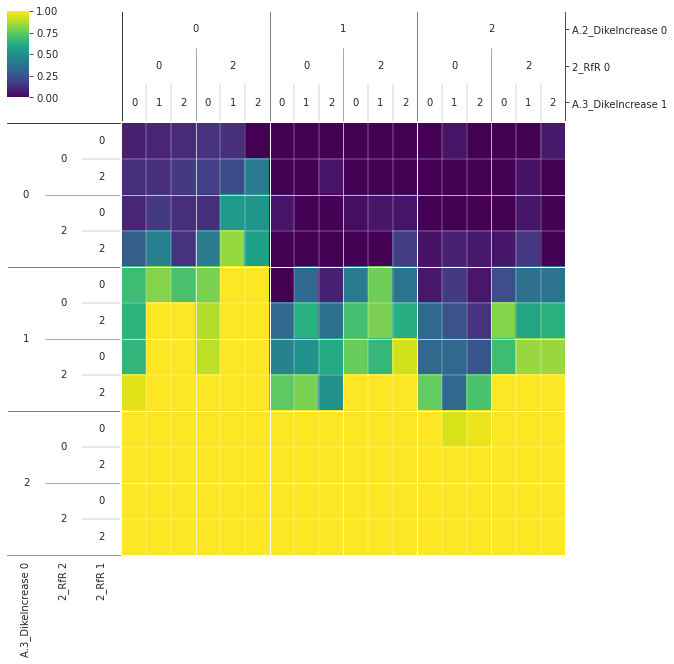

In [69]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_pfailscenario, y_A3_pol_pfail_deaths)
plt.show()

Dike increase in the area is again the safest option, but it becomes clear that the dike needs to be higher compared to the reference scenario and the Bmax scenario. Room for the river 2 is also having an important impact in the area.

In [70]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_pfailscenario["A.1_Expected Number of Deaths"]

y_A1_pol_pfail_deaths = data == 0

prim_alg = prim.Prim(cleaned_experiments_pfailscenario, y_A1_pol_pfail_deaths, threshold=0.8, peel_alpha=0.01)
box7 = prim_alg.find_box()

In [71]:
box7.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.933206
density     0.937569
id                 1
mass           0.909
mean        0.937569
res_dim            1
Name: 1, dtype: object

                   box 1                                      
                     min   max                       qp values
A.1_DikeIncrease 0   0.5  10.0  [2.9710741947783897e-08, -1.0]



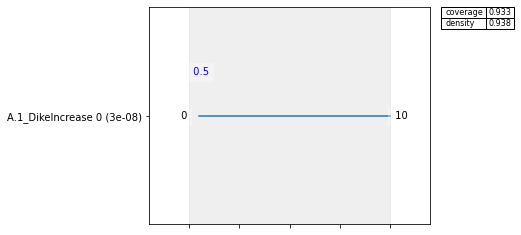

In [72]:
box7.inspect(1)
box7.inspect(1, style='graph')
plt.show()

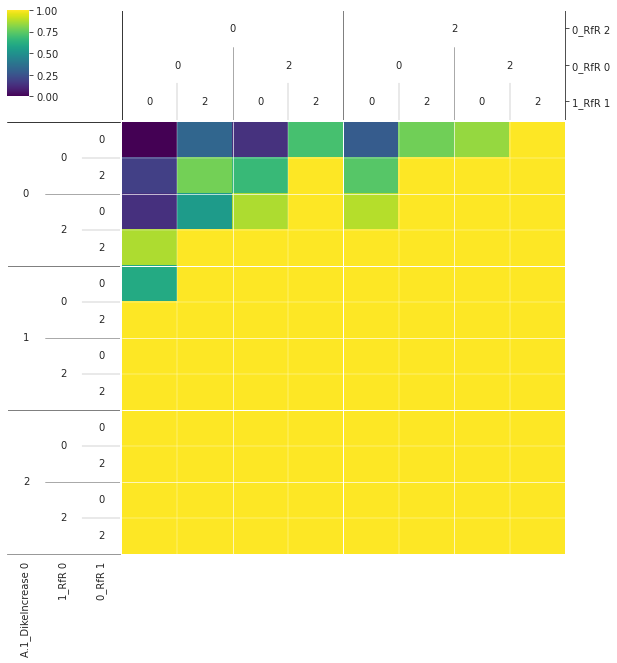

In [73]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_pfailscenario, y_A1_pol_pfail_deaths)
plt.show()

In [74]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_pfailscenario["A.2_Expected Number of Deaths"]

y_A2_pol_pfail_deaths = data == 0

prim_alg = prim.Prim(cleaned_experiments_pfailscenario, y_A2_pol_pfail_deaths, threshold=0.8, peel_alpha=0.01)
box8 = prim_alg.find_box()

In [75]:
box8.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.978139
density     0.861386
id                 6
mass          0.4545
mean        0.861386
res_dim            1
Name: 6, dtype: object

                   box 6                   
                     min   max    qp values
A.2_DikeIncrease 0   5.5  10.0  [0.0, -1.0]



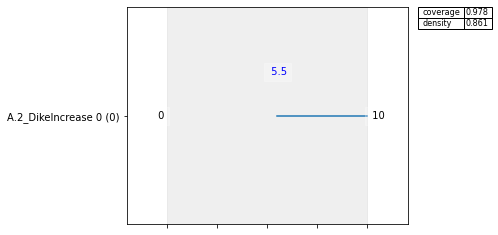

In [76]:
box8.inspect(6)
box8.inspect(6, style='graph')
plt.show()

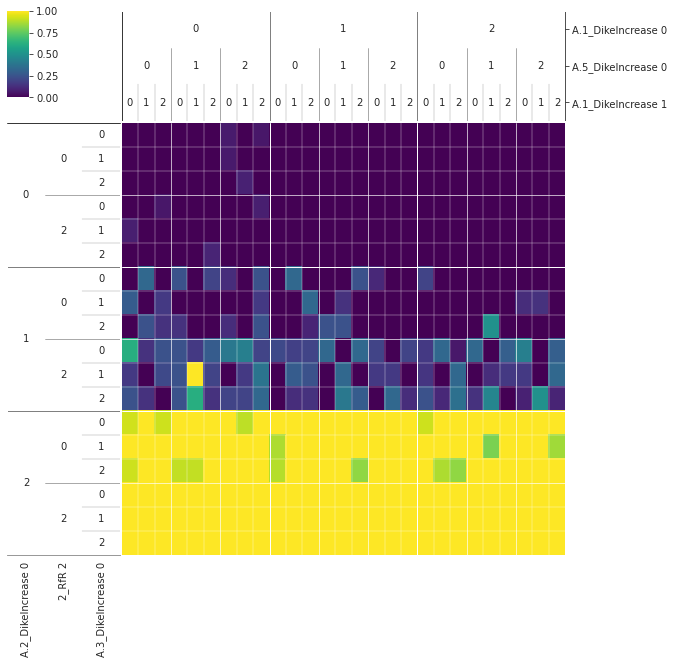

In [77]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_pfailscenario, y_A2_pol_pfail_deaths)
plt.show()

In [78]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_pfailscenario["A.5_Expected Number of Deaths"]

y_A5_pol_pfail_deaths = data == 0

prim_alg = prim.Prim(cleaned_experiments_pfailscenario, y_A5_pol_pfail_deaths, threshold=0.8, peel_alpha=0.01)
box9 = prim_alg.find_box()

In [79]:
box9.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.932305
density     0.852183
id                 3
mass         0.72725
mean        0.852183
res_dim            1
Name: 3, dtype: object

                   box 3                                       
                     min   max                        qp values
A.5_DikeIncrease 0   2.5  10.0  [1.0177026550489591e-116, -1.0]



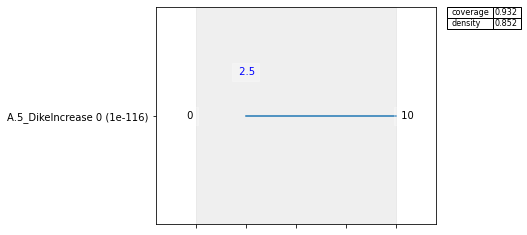

In [80]:
box9.inspect(3)
box9.inspect(3, style='graph')
plt.show()

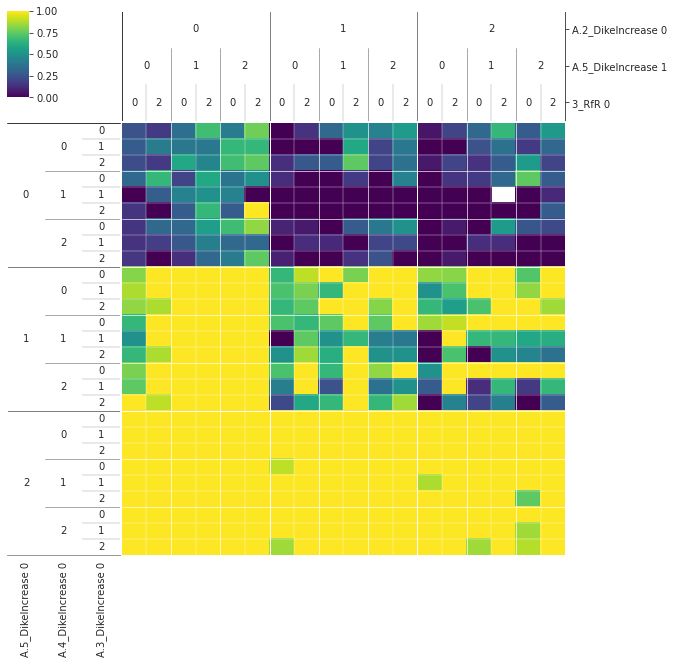

In [81]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_pfailscenario, y_A5_pol_pfail_deaths)
plt.show()

In [82]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_refscenario["A.5_Expected Number of Deaths"]

y_A5_pol_ref_deaths = data == 0

prim_alg = prim.Prim(cleaned_experiments_ref_scenario, y_A5_pol_ref_deaths, threshold=0.8, peel_alpha=0.01)
box10 = prim_alg.find_box()

In [83]:
box10.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.980156
density      0.89659
id                 1
mass           0.909
mean         0.89659
res_dim            1
Name: 1, dtype: object

                   box 1                                     
                     min   max                      qp values
A.5_DikeIncrease 0   0.5  10.0  [5.261903187181237e-29, -1.0]



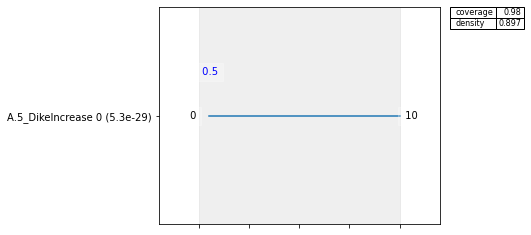

In [84]:
box10.inspect(1)
box10.inspect(1, style='graph')
plt.show()

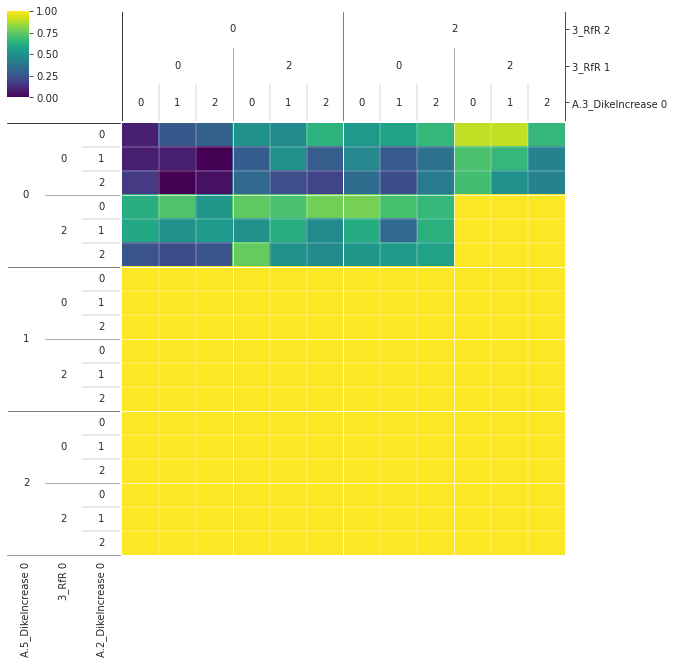

In [85]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_ref_scenario, y_A5_pol_ref_deaths)
plt.show()

In [86]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_pfailscenario["A.4_Expected Number of Deaths"]

y_A4_pol_pfail_deaths = data == 0

prim_alg = prim.Prim(cleaned_experiments_pfailscenario, y_A4_pol_pfail_deaths, threshold=0.8, peel_alpha=0.01)
box11 = prim_alg.find_box()

In [87]:
box11.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.961508
density     0.832932
id                 3
mass         0.72725
mean        0.832932
res_dim            1
Name: 3, dtype: object

                   box 3                                      
                     min   max                       qp values
A.4_DikeIncrease 0   2.5  10.0  [2.906803855428457e-128, -1.0]



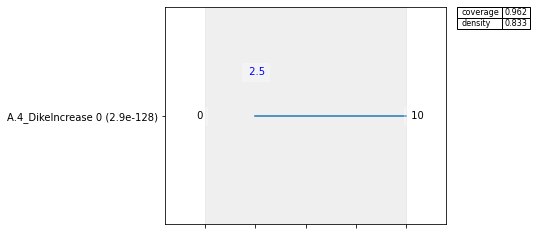

In [88]:
box11.inspect(3)
box11.inspect(3, style='graph')
plt.show()

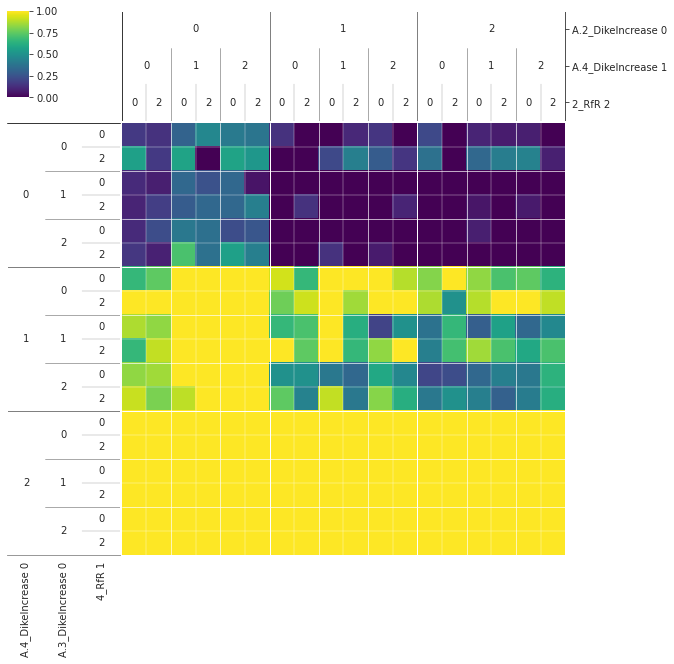

In [89]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_pfailscenario, y_A4_pol_pfail_deaths)
plt.show()